In [0]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = ["airplane", "automobile", "bird", "cat",
         "deer", "dog", "frog", "horse", "ship", "truck"]

deer


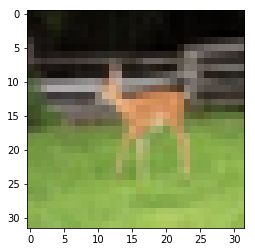

In [0]:
import matplotlib.pyplot as plt
import random
c = random.randint(0, 49999)
print(trans[y_train[c][0]])
plt.imshow(x_train[c])

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn = Sequential()
# 1filter 3 * 3 * 3  * (64) + 64(bias) = 1792
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu", 
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(512, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
# ADD
cnn.add(Dropout(0.25))
cnn.add(Dense(128, activation="relu"))
# ADD
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

W0904 05:27:34.736835 139797136054144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 05:27:34.781062 139797136054144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 05:27:34.787598 139797136054144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 05:27:34.820303 139797136054144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0904 05:27:34.889835 139797136054144 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 512)        

In [0]:
from keras.utils.np_utils import to_categorical
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# 1: sigmoid + binary_crossentropy
# >2: softmax + categorical_crossentropy
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

W0904 05:27:35.958251 139797136054144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 05:27:35.991536 139797136054144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# batch_size: 看多少筆再調整
# epochs: 整本書要看幾遍(控制模型最好的重要關鍵)
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split=0.1,
        verbose=2)

W0904 05:27:36.207453 139797136054144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 19s - loss: 1.8012 - acc: 0.3242 - val_loss: 1.3865 - val_acc: 0.4796
Epoch 2/10
 - 12s - loss: 1.2564 - acc: 0.5445 - val_loss: 1.0454 - val_acc: 0.6238
Epoch 3/10
 - 12s - loss: 0.9910 - acc: 0.6501 - val_loss: 0.8769 - val_acc: 0.6888
Epoch 4/10
 - 12s - loss: 0.7951 - acc: 0.7232 - val_loss: 0.8088 - val_acc: 0.7206
Epoch 5/10
 - 12s - loss: 0.6559 - acc: 0.7727 - val_loss: 0.7616 - val_acc: 0.7368
Epoch 6/10
 - 12s - loss: 0.5488 - acc: 0.8109 - val_loss: 0.7319 - val_acc: 0.7550
Epoch 7/10
 - 12s - loss: 0.4405 - acc: 0.8486 - val_loss: 0.7397 - val_acc: 0.7640
Epoch 8/10
 - 12s - loss: 0.3369 - acc: 0.8848 - val_loss: 0.7612 - val_acc: 0.7704
Epoch 9/10
 - 12s - loss: 0.2558 - acc: 0.9133 - val_loss: 0.7512 - val_acc: 0.7874
Epoch 10/10
 - 12s - loss: 0.2019 - acc: 0.9315 - val_loss: 0.8700 - val_acc: 0.7782


In [0]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 191us/step


[0.915833987057209, 0.7572]

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=trans,
             index=trans)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,821,13,35,9,18,4,5,13,66,16
automobile,22,882,1,10,0,5,2,9,24,45
bird,72,3,619,65,110,44,18,55,11,3
cat,31,8,40,552,77,163,32,77,15,5
deer,21,1,32,46,795,22,11,61,9,2
dog,19,2,30,127,63,653,11,87,2,6
frog,10,7,37,64,71,18,755,17,15,6
horse,22,2,13,19,50,38,1,843,6,6
ship,61,16,8,15,7,9,2,8,862,12
truck,48,76,6,19,4,4,2,25,26,790


In [0]:
y_test.shape

(10000, 1)

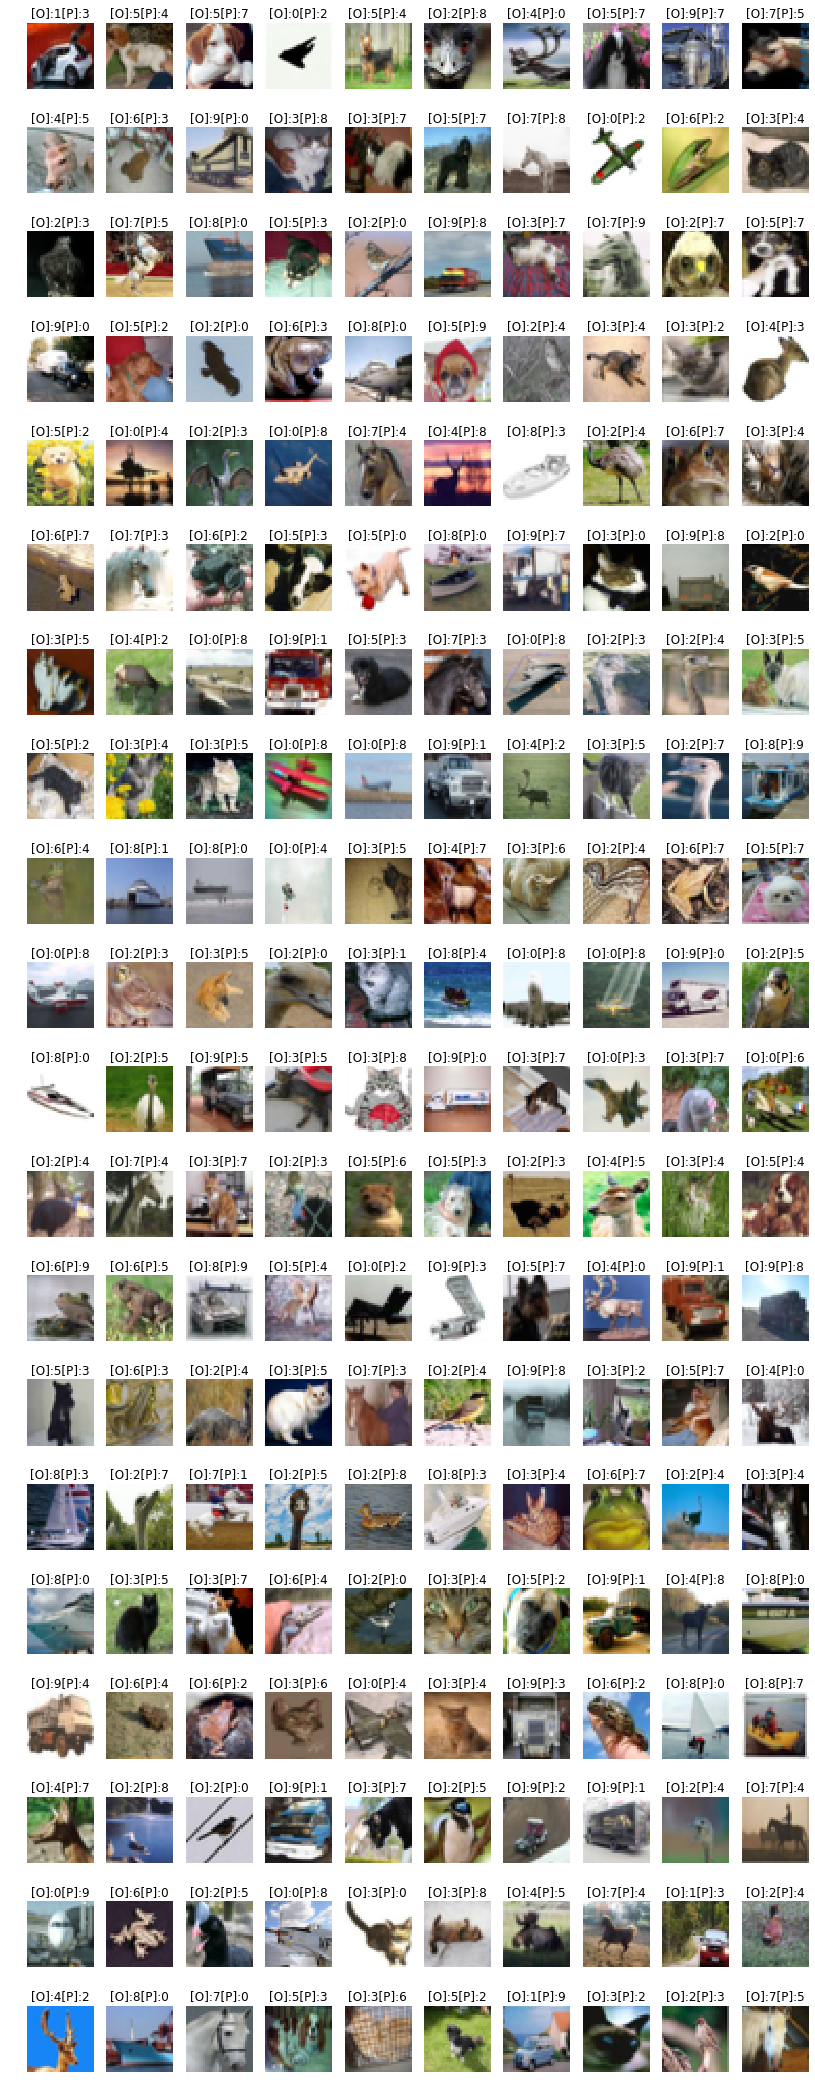

In [0]:
import numpy as np
idx = np.nonzero(pre != y_test.reshape(10000))[0]
idx = idx[:200]
false_img = x_test[idx]
false_ori_label = y_test[idx]
false_pre_label = pre[idx]
width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    msg = "[O]:" + str(false_ori_label[i][0]) + "[P]:" + str(false_pre_label[i])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)
# airplane	automobile	bird	cat	deer	dog	frog	horse	ship	truck

In [0]:
cnn.save("cnn.h5")

In [0]:
# 如果你想看到h5樣子: https://support.hdfgroup.org/products/java/release/download.html
from keras.models import load_model
loaded = load_model("cnn.h5")
loaded.evaluate(x_test_norm, y_test_cat)


10000/10000 [==============================] - 2s 241us/step


[0.915833987057209, 0.7572]